# Midterm

author: Luis Perez

email: luis0@stanford.edu

# Imports

In [12]:
import numpy as np
from scipy import linalg
import seaborn as sns
import math

## Problem 1: Optimal correction of facial features used by face recognition algorithms
### Part (b)

In [6]:
"""Loading face_features_data.m"""
# number of features
n = 20
# number of example faces (and feature matrices)
K = 5
# example faces
F1 = np.array([
[0.5,-0.5,0,-0.05,0.05,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
[1.0,1.0,0.1,-0.05,-0.05,-0.8,-0.85,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.85,-0.8]
])
F2 = np.array([
[0.55,-0.55,0,-0.05,0.05,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
[1.0,1.0,0.2,-0.01,-0.01,-0.8,-0.85,-0.9,-0.9,-0.9,-0.9,-0.89,-0.88,-0.89,-0.9,-0.9,-0.9,-0.9,-0.85,-0.8]
])
F3 =np.array([
[0.5,-0.5,0,-0.05,0.05,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
[1.05,1.03,0.08,-0.05,-0.05,-0.8,-0.85,-0.86,-0.87,-0.88,-0.89,-0.9,-0.91,-0.9,-0.89,-0.88,-0.87,-0.86,-0.85,-0.8]
])
F4 = np.array([
[0.6,-0.6,0,-0.05,0.05,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
[.9,.9,0.075,-0.05,-0.05,-0.8,-0.85,-0.875,-0.89,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.89,-0.875,-0.85,-0.8]
])
F5 = np.array([
[0.56,-0.56,0,-0.05,0.05,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
[1.1,1.1,0.1,-0.05,-0.05,-0.85,-0.875,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.875,-0.85]
])

In [7]:
# rotated and scaled measurement
Y_rot = np.array([
[-0.159955655589731,-1.33134307892299,-0.149129873451272,-0.0457883892062209,0.0607013765513481,-0.148908866497895,-0.00513663237750780,0.138635601742879,0.245125367500448,0.351615133258017,0.458104899015586,0.557138171100591,0.656171443185597,0.770117702615729,0.884063962045862,0.990553727803431,1.09704349356100,1.20353325931857,1.27274055671332,1.34194785410807],
[1.47500480956669,0.654790505584691,0.212979531515138,-0.0479314449385749,0.0266334917870611,-1.37387268314000,-1.35255262929315,-1.33123257544630,-1.25666763872066,-1.18210270199503,-1.10753776526939,-1.02232385196800,-0.937109938666607,-0.873193978516728,-0.809278018366849,-0.734713081641213,-0.660148144915577,-0.585583208189941,-0.457773388585520,-0.329963568981100]
])

In [196]:
def getRotationMatrix(x, y):
    """Finds the rotation + scaling matrix such that y = Rx"""
    alpha = linalg.norm(y) / linalg.norm(x)
    d = np.dot(y,x) / (linalg.norm(x) * linalg.norm(y))
    theta = np.arccos(d)
    R = alpha * np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    if np.allclose(np.dot(R, x), y):
        return R
    theta = 2*math.pi - theta
    R = alpha * np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    if np.allclose(np.dot(R, x), y):
        return R
    raise ValueError("This is not possible")
    
def findMatchingFace(candidateFaces, observedFace):
    """Returns index in candidateFaces matching the observedFace"""
    results = []
    for i, face in enumerate(candidateFaces):
        R = getRotationMatrix(face[:, 0], observedFace[:,0])
        if np.allclose(np.dot(R, face), observedFace):
            results.append((i, R))
    assert len(results) == 1
    return results[0]

In [197]:
faces = [F1, F2, F3, F4, F5]
index, R = findMatchingFace(faces, Y_rot)

In [198]:
assert np.allclose(np.dot(R, faces[index]), Y_rot)

In [199]:
print("Y_rot corresponds to $F_%s$." % (index + 1))

Y_rot corresponds to $F_2$.


### Part (d)

In [213]:
Y_noisy = np.array([
[0.6643,-1.0615,0.2158,0.1961,0.3398,-0.3526,-0.1577,0.0293,0.1507,0.2684,0.4543,0.5414,0.7290,0.8677,1.0180,1.1605,1.2837,1.3910,1.5616,1.6403],
[1.6783,1.0782,0.1971,0.0118,0.0585,-1.4016,-1.4223,-1.4022,-1.3651,-1.3600,-1.2885,-1.2392,-1.1590,-1.1113,-1.0985,-1.0010,-0.9753,-0.8606,-0.7619,-0.6922]
])

In [237]:
# Compute weighed centroids of datasets.
def faceComputeMatrices(face, noisy):
    N = face.shape[1]
    xbar = np.mean(face, axis=1)
    ybar = np.mean(noisy, axis=1)
    xbar.shape = (2,1)
    ybar.shape = (2,1)
    xCentered = face - xbar
    yCentered = noisy - ybar
    S = np.dot(xCentered, yCentered.T)
    u, s, v = np.linalg.svd(S)
    R = np.dot(v, u.T)
    # Verify it is rotation.
    assert np.allclose(np.linalg.det(R), 1)
    den = 0.0
    num = 0.0
    for i in range(N):
        num += np.dot(np.dot(yCentered[:, i].T, R), xCentered[:, i])
        den += np.dot(xCentered[:, i].T, xCentered[:, i])
    alpha = num / den
    t = ybar - alpha * np.dot(R, xbar)
    return alpha * R, t


In [243]:
for i, face in enumerate(faces):
    R, t = faceComputeMatrices(face, Y_noisy)
    print("Scale rotation + translation estimates for $F_%s$" % (i+1))
    print(R)
    print(t)
    # Compute the RMSE error.
    _, N = Y_noisy.shape
    error = 0.0
    for j in range(N):
        error += (1/N) * linalg.norm(Y_noisy[:, j] - np.dot(R, face[:, j] - t))
    print("RMSE for $F_%s$ is %s" % (i + 1, np.sqrt(error)))

Scale rotation + translation estimates for $F_1$
[[ 1.38710025 -0.50402031]
 [ 0.50402031  1.38710025]]
[[0.26475362]
 [0.07103614]]
RMSE for $F_1$ is 1.215783026538849
Scale rotation + translation estimates for $F_2$
[[ 1.36865856 -0.49728905]
 [ 0.49728905  1.36865856]]
[[0.27399331]
 [0.04565355]]
RMSE for $F_2$ is 1.202885795582196
Scale rotation + translation estimates for $F_3$
[[ 1.38049264 -0.49966651]
 [ 0.49966651  1.38049264]]
[[0.27343758]
 [0.05007972]]
RMSE for $F_3$ is 1.2080822140116791
Scale rotation + translation estimates for $F_4$
[[ 1.42094548 -0.5162301 ]
 [ 0.5162301   1.42094548]]
[[0.25391536]
 [0.10100179]]
RMSE for $F_4$ is 1.2321052401027686
Scale rotation + translation estimates for $F_5$
[[ 1.33411965 -0.48425504]
 [ 0.48425504  1.33411965]]
[[0.27703282]
 [0.03803171]]
RMSE for $F_5$ is 1.1978958153633974


In [247]:
# The closest face is F5. So let's plot that.
R = np.array([[ 1.33411965, -0.48425504],
 [ 0.48425504,  1.33411965]])
t = np.array([[0.27703282],
 [0.03803171]])
translated = np.dot(R, F5) + t

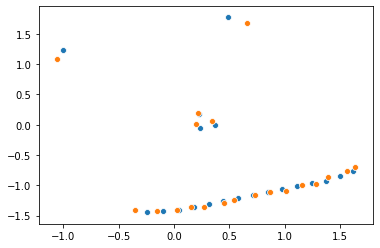

In [260]:
sns.scatterplot(x=translated[0, :], y=translated[1, :])
ax = sns.scatterplot(x=Y_noisy[0, :], y=Y_noisy[1, :])
ax.get_figure().savefig("test")

In [211]:
np.mean(F1, axis=1)

array([-1.66533454e-17, -5.60000000e-01])

In [209]:
# Find
F1Concat = np.concatenate([F1, np.ones((1,20))], axis=0)
np.dot(np.dot(Y_noisy, F1Concat.T), np.linalg.inv(np.dot(F1Concat, F1Concat.T)))

array([[ 1.46558094, -0.48848387,  0.27345403],
       [ 0.53870348,  1.35194456,  0.05134896]])

## Problem 2: Fitting the power consumption of a system
### Part (d)

In [50]:
x_ble_noisy = np.array([[-0.0102419750790672],[-0.00235019955097078],[-0.000811565974590315],[0.0111774857668938],[-0.00154273913049457],[0.00432904745407981],[0.000404935381484457],[0.00394375654902785],[-0.0104296827744207],[0.00798512399533279],[-0.000209135352212247],[-0.00264079495831172],[0.00285372345080362],[0.00854008869889362],[0.00304103611047493],[0.00460001059089521],[-0.00196219054821868],[-0.00427576517717219],[-0.00368639186476870],[0.00225276563152884],[0.00111465870165465],[-0.000909697150473637],[-0.000549530083819992],[0.00121509484625486],[-0.00619559988331540],[0.00214408917561309],[-0.00335367555037490],[-0.00262640225023161],[-0.00390583202056417],[0.00143488641781192],[-0.000565660361106982],[-0.00162692422697592],[0.00475781444072213],[-0.00209680280773814],[0.000715746179459963],[0.00335211247116154],[-0.00250357807483179],[-0.00497155215864486],[0.00749446931721240],[0.00131373910335851],[-0.00527070746319127],[-0.000510538795765698],[0.00267909314901277],[0.000399674302266372],[0.00296343927080282],[-0.00588221215318944],[-0.00299543928390449],[0.000393980770770245],[0.000581402649396716],[-0.00299697734807440],[-0.00462556262103516],[-0.00191646784504768],[-0.00617600156613045],[-0.00567181852734342],[-0.00131579708057360],[0.00578038975240996],[0.00688510659025510],[-0.00214914069213954],[-0.00561042523163430],[0.00208879506486936],[0.00860906754554740],[-0.00610006021345993],[-0.00115936930712098],[-0.0113035042639134],[0.00226841338049512],[0.00349504640740311],[-0.00376600930418046],[0.00719587047979671],[0.00798050823911016],[-0.00338306950311943],[0.00127791868335114],[-0.00309825183647490],[-0.00274999158709494],[-0.00165756588997878],[-0.00455238608203493],[0.00175801138194391],[0.00445928988648572],[0.00688632705128392],[-0.000343706102932185],[-0.00178116875765006],[-0.0164961801113706],[0.00639885503005284],[-0.00646088000280737],[-0.00402211089159713],[0.00321567841232657],[-0.00483058040808890],[-0.00810003312296000],[0.00186162285675038],[-0.00114205640624526],[-0.00792529620857425],[0.00875245342419799],[-0.00186455280773287],[-0.00439670352532971],[-0.00358903068988337],[0.00539648559255978],[0.00979637217159729],[0.00486141367926763],[-0.00478442871061381],[-0.000553700791982319],[0.00576542273008664],[0.00561757545479734],[-0.00508328066375861],[-0.00253161989773289],[-0.000758288203984795],[-0.00410233209256286],[0.00162407945249407],[-0.00816968186862310],[-0.00711309328698587],[-0.00845480963700140],[0.00141804382355546],[0.00180592293702119],[0.00706703116678854],[0.00561024604766200],[-0.00684078456768251],[0.00543098282280579],[-0.00238404307153638],[-0.000544914265219767],[-0.00100733965087709],[0.00298362621153014],[-0.00166521765178943],[-0.00210062228080452],[-0.00101002489220120],[-0.00621561063476530],[0.00471346989013525],[-0.00504254692923918],[0.00303670360843098],[-0.00390572309956804],[0.00310970061023794],[-0.00911003283147416],[-0.0123445157084972],[-0.00425402148573278],[0.000447498517922041],[0.00924840250539393],[-0.00530215215298251],[0.00439840080728083],[0.00821675458555825],[0.0109124550689419],[0.0129905067792007],[0.000383214759944293],[0.00810907734434041],[-0.00465038365036465],[-0.00310786641736640],[-0.00448805341879926],[-0.00314274410566906],[0.0180677099205428],[0.00514818048786379],[-0.000810571009566468],[0.00461913805135831],[-0.00219594530881856],[-0.0123307704732186],[-0.00535637967944584],[-0.00394810162478300],[0.00469432620589295],[-0.00562074621754227],[-0.00703190362111114],[-0.00141832612892958],[-0.00370498323322921],[-0.00650407330650700],[0.00741732548406564],[0.0115522757193270],[-0.00825284827567812],[-0.000431950749471328],[0.00601151204212411],[0.00167395772966370],[-0.000619608921099682],[0.00334914863572342],[-0.00718308407779746],[0.00845871777290387],[-0.00203615232717355],[0.000216282885424106],[-0.00527199256565206],[-0.000424693584493431],[0.00494436779229924],[0.00206980912666650],[0.00220427237514502],[-0.00245749280825455],[-0.00241795595032956],[0.00382198474863877],[0.00393510190164932],[0.00230711477808902],[0.00806443014165158],[0.00305686874846828],[-0.00933780880860004],[-0.000944714707099726],[-0.00428636700127359],[0.00351249809951627],[0.00832667901772919],[0.00611616108875189],[0.00810552557920523],[-0.00163703571825414],[-0.00473157679483679],[-0.00319961432574135],[-0.00335629275660948],[0.00505315490244720],[0.00286037751175229],[-0.00233356896642562],[-0.000702418835645614],[0.00313523687739689],[0.000411482324156652],[-0.00852517047763901],[-0.00544230582966937],[-0.00753964755008094],[-0.00398220754804835],[-0.00360615306213507],[0.00371882158129226],[0.00547889345427433],[0.00237433249469648],[0.00931714843621839],[-0.00273641798683053],[0.000296554919410015],[0.00515778918924060],[-0.00457681898293415],[0.00434383376652562],[0.00848884265059320],[-0.00471183589450015],[0.000799932788085414],[-0.00322818237490846],[-0.000203196073348246],[-0.00437557848342329],[0.00198497322406084],[-0.00253532510822269],[-0.00121342239560857],[-2.92094109897788e-05],[0.00250907616427955],[0.00754600073493776],[-0.00458377058875769],[-0.00668123486383587],[0.00169669326477454],[0.00246938495687347],[0.00554574758256197],[-0.00204118060000452],[-0.0123651732339128],[-0.00479672717164305],[0.00582964769773960],[0.000668743076769066],[-0.00281570129799522],[0.00441683255712931],[-0.00268978302165565],[-0.00830086988720508],[0.00511133749156891],[-0.00534630512336611],[0.000266972454132735],[0.00653984405904620],[-0.000491315764227160],[-0.00625875897362953],[-0.00375123630382741],[-0.00228331718308934],[0.00638670720908742],[0.00304109157917088],[0.00254839201909234],[-0.00361441492837690],[-0.00360799925813544],[-0.00541274292731876],[0.00206631269382321],[0.00411696108020526],[-0.00197935423382432],[-0.00630690021735222],[-0.00943337880609055],[0.00915218607530456],[-0.00679420149528167],[0.00630268919206835],[-0.00811878899510300],[0.000131061166248733],[0.000294226245696262],[0.00208462023235124],[0.00100029779644419],[-0.00677635373643895],[-0.000941218106849973],[-0.00183189374426344],[0.00281709253273368],[0.00348648693327604],[0.00600387911487995],[-0.0118664211591850],[-0.00386014903383205],[0.000407460336705616],[0.00655936787501959],[-0.00397191952282498],[-0.00250896113795577],[0.00202358214807400],[0.0124196055972545],[-0.00439370611780985],[-0.00280913455412581],[0.00849727940358781],[0.00507181937970814],[0.00316521512455719],[0.00100759595993473],[0.00331678503356226],[0.00313418370930149],[0.00679974522948365],[0.0124292379740306],[-0.000586941706854600],[0.00150677626653346],[0.00681731693722167],[0.00771060743464414],[0.000769366925289629],[-0.000407767949722960],[0.00465561451966816],[-0.000946342271713606],[0.00616129053524276],[0.00179395930038904],[0.00643176730389450],[0.00735367116039063],[-0.000612047958711665],[-0.00365492683672352],[0.00290650181659121],[0.000823293029894285],[0.00516291130074143],[0.00320082092971459],[-0.00536551934265631],[-0.00313756871698679],[-0.00252834070640826],[-0.00350550851859865],[-0.00399675331556821],[0.00115126043680798],[-0.00339240330361577],[-0.00670569285756226],[0.00234600927206741],[0.000801195711891894],[-0.00227733226550751],[-0.00488480100062196],[0.000689177735204698],[0.00432856557868835],[0.00448553180738895],[0.000782540086755456],[0.00311788864298984],[-0.00166257799880090],[0.00119326281651540],[0.00819578811642698],[0.00615893790192718],[0.00770022446710694],[-0.00503487116287225],[0.00434616640999299],[-0.00663406756850505],[-0.0115909368390539],[-0.0150051166974337],[-0.00312730741400320],[-0.00177422860707987],[0.00746302043024123],[0.00123782575733904],[-0.000259016347740768],[0.00165522493565285],[0.0120476332097455],[0.00390821425039184],[-0.00154312521458569],[-0.00453657000552328],[-0.00122342074708473],[-0.00324333087655971],[-0.00168457823640108],[-0.00738524743415066],[-0.00161712562763985],[0.00322603461316726],[0.0115931941345904],[-0.000514046505684901],[0.00245315812664681],[-0.00785077282002741],[-0.00212294092152524],[0.00396875614252325],[-0.00231698719034538],[-0.00595031435827382],[-0.00126979457592139],[0.000848043608963921],[-0.000778782488588944],[-0.00331147019413196],[0.000304599488351624],[0.00647862543857123],[-0.000767057827347205],[0.00323435387002713],[-0.00147283716001801],[0.00237173275350991],[-0.00669655202961388],[0.00349571727175224],[8.12024970337994e-05],[-0.00119634553598823],[-0.00169832937834263],[-0.00243673158573464],[-0.00788058962272183],[-0.00178490733391317],[0.00682115383696881],[0.00390111635005689],[-0.00291394019991704],[-0.00452948989240458],[0.00780743199524729],[0.0107802058787194],[0.00989659523398062],[-0.00176217711666593],[-0.00531590164257818],[-0.000930660945250124],[-0.000634914779061409],[0.00373091573917581],[-0.00260675311690819],[-0.00364336446007696],[-0.00382279642026468],[-0.00758708131457034],[-0.00227429686013986],[-0.000619804610120792],[0.000537419981755142],[0.00288133828614554],[0.00242513959204351],[0.00510082123133756],[0.00127712890437016],[0.00346671134764452],[-0.00504255223851359],[0.0133113669844007],[0.00802856928914720],[0.0141601589350128],[-0.0134396246172708],[-0.00336973434213853],[-0.00603056995877063],[-0.00317763872883734],[-0.00170511755854133],[0.000177154971773599],[0.0115302385258659],[-0.00367333912025480],[-0.0192744264553678],[-0.00639243321947414],[-0.000261573892353406],[0.000748692032216816],[0.00140215874696335],[-0.00184415098390419],[-0.000546888185320518],[-0.00511125058467648],[0.00294472490852303],[0.00827061450909432],[-0.00277641850951328],[0.00382152131091975],[-0.00371525626936851],[0.00730653726535432],[-0.00156781220012298],[0.00337847795382471],[0.00668391194894688],[-0.00414647438343387],[-0.00930053614090402],[-0.000721519880587028],[0.00396958208556057],[0.00785453794253530],[-0.00190870113864965],[0.000245972714645755],[0.000502149050709407],[-0.00335340874525104],[2.07675661413841e-05],[0.0138062921222996],[-0.00479490997463158],[0.0115878114609296],[-0.00243064692852239],[-0.00222461978987666],[0.00421703512774069],[0.00375943260203087],[-0.00136962915912174],[-0.000556465686467657],[0.0220270822904202],[0.0309744019056953],[0.0147214165946755],[0.0247268804804529],[0.0196472005024705],[0.0180138254064586],[0.0310380248766085],[0.0240513792933324],[0.0137878369220351],[0.0251537345126687],[0.0141980114982144],[0.0232903423501771],[0.0160905271590453],[0.0198453883272640],[0.0211040631536426],[0.0202564415130075],[0.0200574934634481],[0.0176857708596768],[0.0184929381862702],[0.0261632627684460],[0.0217390096020641],[0.0229366960566719],[0.0212826831822575],[0.0350252751753688],[0.0166413734085761],[0.0225155682868329],[0.0174788107783293],[0.0177456434561992],[0.0154883876323154],[0.0275329514770966],[0.0137227757519736],[0.0253208834120192],[0.0203139422279448],[0.0218743418458581],[0.0147105621053256],[0.0110068808534813],[0.0282414224536617],[0.0264778003384666],[0.0172671829534791],[0.0328753576327905],[0.0207975280992793],[0.0231293257252023],[0.0256110739168348],[0.0303610083806794],[0.0152016244454160],[0.0194602259512662],[0.0184695947751181],[0.0160726023656058],[0.0107191813723807],[0.0267956541141109],[0.00815928451175399],[0.0241828572820031],[0.0230980936910278],[0.00653107308947599],[0.0188942325311703],[0.0315369581857379],[0.0168869805824921],[0.0282445533317647],[0.0118216295531860],[0.0242853035742768],[0.0220948839033600],[0.0209078693427707],[0.0266583614988037],[0.0221663308477347],[0.0164502104028846],[0.0191516120352514],[0.0165977024962416],[0.0277810671988656],[0.0131150067231462],[0.0187250120918135],[0.0103222161472915],[0.0313241711505713],[0.0238939579136987],[0.0274682082464402],[0.0163004733642639],[0.0229338889050866],[0.0270463481726701],[0.0158220754608081],[0.0190906895302684],[0.00763070840050453],[0.0212494508922251],[0.0164052813182418],[0.0168711312373089],[0.0128847470599061],[0.0216166505510919],[0.0192071182728729],[0.0222277322584862],[0.0236021911173552],[0.0199647019308018],[0.0177563086404623],[0.0200594828007653],[0.0287917052945018],[0.0255816900559426],[0.0130748477871855],[0.0139031767632182],[0.00810320186825069],[0.0231404844063004],[0.0246687647809525],[0.0205440253927970],[0.0191210699815454],[0.0168023093268005],[0.0210224897437932],[0.0256281772340939],[0.0293160407258526],[0.0200354757180142],[0.0297703274202403],[0.0175396445273263],[0.0186337325647759],[0.0173778926253344],[0.0182306748888321],[0.0221381212787784],[0.0101874283275197],[0.0153307362727953],[0.0207841038593493],[0.0306136554222257],[0.0262393021262517],[0.0227772002952123],[0.0220394844852531],[0.0156201379621542],[0.0164984482675133],[0.0186738484823665],[0.0269333519358878],[0.0199709268724008],[0.0237405679756351],[0.0246010054824408],[0.0172518508547114],[0.0188705757343579],[0.0153378464569323],[0.0246130358662372],[0.0240678541569936],[0.00771400663404599],[0.0270645333106405],[0.0143035165890241],[0.0243324825135336],[0.0149016796507933],[0.0185848676023504],[0.0201759602731864],[0.0151456962000105],[0.0226378032638255],[0.0151544007914946],[0.0171552423183321],[0.0237972464911676],[0.0215090426708607],[0.0267135371054210],[0.0377625575719321],[0.0175724058641178],[0.0192261461299424],[0.0158730110518306],[0.0148707206219800],[0.0247226979566134],[0.0192634879488366],[0.0226225291531509],[0.0199642807872710],[0.0258849519894926],[0.0263806751487442],[0.0163532845476960],[0.0178476011958120],[0.0177207269811234],[0.0215677220569743],[0.0239970566891989],[0.0193187594054975],[0.0601149375842475],[0.0526675334270166],[0.0607370273685798],[0.0591413498484717],[0.0569490235449803],[0.0640277023510906],[0.0581178072450761],[0.0682312965153594],[0.0613673564177792],[0.0450808838136840],[0.0555029344531822],[0.0596753570014416],[0.0628022029515117],[0.0555189717621417],[0.0614827828686445],[0.0544984455720632],[0.0530625850664413],[0.0590009240398453],[0.0541213649137900],[0.0689432656037141],[0.0535449810790599],[0.0582821446576683],[0.0571163785381656],[0.0612777311194068],[0.0498507604226571],[0.0653723481162899],[0.0514069368447570],[0.0533554841699430],[0.0641113256762044],[0.0629371100005894],[0.0621146029847106],[0.0608828501118423],[0.0589003771897725],[0.0540367918571246],[0.0687517639216697],[0.0614835520068805],[0.0479169616993595],[0.0591550261900341],[0.0551968552359229],[0.0551488294881442],[0.0634136879541767],[0.0527096448900894],[0.0545052298582941],[0.0590397814532702],[0.0516923199528669],[0.0200140436460616],[0.0173406324081461],[0.0292238135064302],[0.00878942155895433],[0.0223378256028816],[0.0140349673268201],[0.0197766461965838],[0.0137288194122934],[0.0287256566071426],[0.0148567157068555],[0.0276041624336020],[0.0224140625935016],[0.0160591723817809],[0.0126068676761877],[0.0183168848550124],[0.0216503596134616],[0.0129837111053790],[0.0172405765874992],[0.0116415912574632],[0.0168777218168976],[0.0255128459543513],[0.0249016894986014],[0.0260578472182134],[0.0185457541967161],[0.0226313856249143],[0.0145116933246876],[0.0114235320606087],[0.0272680867580263],[0.0210340129439597],[0.0206337773752984],[0.0222776006211840],[0.0185924124987117],[0.0313535359607240],[0.0218638154588655],[0.0226720568390101],[0.0164772804365262],[0.0224573112463988],[0.0233041780304271],[0.0237672233023724],[0.0238430904232272],[0.0140369332063258],[0.0251761093275893],[0.00855158037360482],[0.0108424971907814],[0.0121812682295090],[0.0214090242400677],[0.0213145557180523],[0.0118897261189135],[0.0249161368947491],[0.0268341907715297],[0.0235520527877397],[0.0177118508725025],[0.0127063697458232],[0.00902709415797959],[0.0241344739671320],[0.0189617664311213],[0.0193082696029187],[0.0207299855346118],[0.0199179484609116],[0.0203707024041808],[0.0175425927137740],[0.0259941769075841],[0.0258417185462146],[0.0343703895913592],[0.0193398362827609],[0.0151938641141888],[0.0109009076895289],[0.00312649753052958],[0.0107843351715065],[0.0152360628342545],[0.00517268713013785],[0.0128709222774408],[0.000595038037380039],[0.00978954949542752],[0.00947220065049726],[0.00929759133280891],[0.00529700116896263],[0.0168604815129232],[0.0146180297784156],[0.0159877764829869],[0.0189621778475055],[0.00944418006895859],[0.00682605516680899],[0.0116295429824261],[0.00728348488731455],[0.00991320790404933],[0.00618480059032244],[0.00726941635207438],[0.000937881413727984],[0.0152083931758022],[-0.00461450651042814],[0.00746235731602554],[0.0128838215244852],[0.0160923368613147],[0.0104593790938206],[0.00316077744407094],[0.0106783080515888],[0.00738422702708454],[0.00586424108273445],[0.00278870589424726],[0.00972123354096464],[0.00708285130110650],[0.00258858447355062],[0.00453097194469889],[0.000731025525081281],[0.00956856399113767],[0.00531571020730874],[0.00565721314478832],[0.0106857685931301],[0.00901963106089072],[0.0147887731536267],[0.00953127512764591],[0.0103224349292680],[0.0108910719615468],[0.00755326096452695],[0.0120068712463802],[0.00894988732446045],[0.0130278666978711],[0.00756700488644071],[0.00462686897024583],[0.0124074874878397],[0.00807497983706398],[0.0117232793417128],[0.0185124816135866],[0.00401656981680227],[0.0116928450920152],[0.0118078696099909],[0.0111146670271997],[0.0140971726532805],[0.0109797660086150],[-0.00473806324513092],[0.0160882740050787],[0.0163871970617834],[0.0116799525573759],[0.00773699059225988],[0.00169662929592905],[0.00544722652816402],[0.00866891018841237],[0.0161485855510458],[0.00654201012486922],[0.00305832497290027],[-0.00127915491504621],[-0.00128718592219168],[0.00617473858826836],[0.00261775102303742],[0.0124765270296835],[0.00844201462200615],[0.00848971658784452],[0.0154723995215068],[0.00952638384697252],[0.0112222155632715],[0.00662804852423654],[-0.00422172631366634],[0.0113416552274265],[0.00147834246980859],[0.0115471167144223],[0.00629716395235488],[0.0172234848522147],[-4.70906947553865e-05],[0.00815752855048055],[0.0104854884476981],[0.0223040954897268],[0.00610187720965260],[0.0174086468517162],[0.0122503634776011],[0.00765373888006266],[0.0157468778629383],[0.00878680602506825],[0.00382335171517821],[0.00670158170700445],[0.00348007116878872],[0.0102775439409616],[0.0136605738723990],[0.00990771426167045],[0.00615289533037509],[0.0212049397939179],[0.00783332763674637],[0.0127762303998389],[0.00377219767683601],[0.00930766363249093],[0.0103784611037193],[0.0102354056159526],[0.0116595108680896],[0.0159218347579105],[0.0164205207990652],[0.0135778388969986],[0.00753952862007140],[0.0141565625336966],[0.0225754347660966],[0.00656406377663653],[0.0104891358428674],[0.0153260604405735],[0.0157995688157859],[0.00743828881074855],[0.00825185185485321],[0.0693290720315028],[0.0751960765233994],[0.0823775429370114],[0.0731635577656912],[0.0882981135927221],[0.0764218572976951],[0.0778591563391726],[0.0792877713991184],[0.0707492146873782],[0.0798142431515186],[0.0727883624315856],[0.0746823251426174],[0.0848625514360232],[0.0786830318782407],[0.0790573768088980],[0.0812861601969434],[0.0838697534704030],[0.0773724241145534],[0.0771311489730789],[0.0797377620099513],[0.0778832756996835],[0.0783068543018842],[0.0695025780820537],[0.0787240562232645],[0.0802732349239984],[0.0807410635349679],[0.0827986798612388],[0.0876511875246443],[0.0721810500969633],[0.0718635036181682],[0.0762080550141083],[0.0760879586643221],[0.0811332425230415],[0.0871834914607468],[0.0779591416789039],[0.0782695697694843],[0.0845565376894179],[0.0763683407876213],[0.0856016361432235],[0.0752732212580966],[0.163362522993011],[0.165806776139254],[0.173265547426109],[0.172868117193660],[0.167291007063560],[0.177890862018538],[0.161315710426977],[0.168170037753090],[0.167578815227014],[0.165677715624307],[0.166665466036517],[0.170433917826330],[0.166645844112906],[0.164079867434345],[0.167473074954358],[0.168290326256894],[0.163522446652675],[0.179973979194286],[0.169536331864364],[0.164714445891167],[0.168243105091777],[0.170408305605061],[0.165956933375528],[0.164200390126934],[0.172516922221032],[0.164341887774265],[0.167311637343757],[0.164421871028094],[0.172822027760366],[0.166303990929806],[-0.00163261991651177],[-0.000196170840593197],[0.00392725634830651],[-0.00320879334764610],[-0.0120836117077316],[0.00282543472395202],[0.00291740223005319],[-0.00382598856583974],[-0.00681516273881423],[0.00202501463869029],[0.000896687397308125],[0.00397752317030763],[0.0147336197487327],[-0.000109185730776777],[0.00774323290409234],[0.000323809472911001],[0.00102065345679911],[0.0113304112468065],[-0.00911567031280541],[0.00412662818923585],[0.00748083193683150],[0.000901913752388222],[0.00503989338518272],[-0.00253814095330791],[-0.00190686749374482],[0.00831587148314957],[-0.00187763388915863],[-0.000218236463033376],[0.00399095158331866],[-0.00355032713403952],[0.000611324573205506],[0.00544165650344349],[-0.00517711161814328],[-0.00180166666630891],[0.00416372713625435],[-0.000473263976810393],[0.000232486447949324],[0.000376312497195961],[-0.00888245254814590],[0.00128486433274823],[0.00309069264518753],[-0.00569368267738005],[0.0103463580056753],[-0.00196580479294520],[0.000678223367059843],[0.000895036950184801],[-0.0102334796392547],[0.00762747999488068],[0.00555971072431968],[-0.0119874299645199],[-0.00253637678891567],[0.00627751100485865],[-0.00104393495341576],[0.00170087693343913],[-0.0111376957346955],[0.00230169103095108],[0.000458205633596866],[0.00779148165105643],[-0.00974863774727206],[0.0107991933566616],[-0.00489739198087291],[0.00161924817582742],[0.0114157327896191],[0.00951759045985467],[-0.000814672747376177],[0.00221340823421732],[-0.00812682626004482],[0.00707260301726940],[0.00385955944605420],[-0.00614027039381335],[0.000896722084389217],[0.0164556846842502],[0.00401483168268364],[0.00674139768314190],[-0.00411131571084246],[-0.00740975460973167],[-0.0120675585181456],[-0.00229195583918144],[-0.00702950677284329],[-0.00801222596864583]])
x_gsu_noisy = np.array([[0.0504569685713882],[0.0377078041881281],[0.0481241106077628],[0.0410654676190894],[0.0424127102989451],[0.0415710056035564],[0.0397531922726194],[0.0418102559473080],[0.0445312040221859],[0.0424280180100137],[0.0437371728883684],[0.0441952121140533],[0.0350519340726241],[0.0443011400981833],[0.0445928657196398],[0.0396425335444110],[0.0414226486794217],[0.0438936528017579],[0.0397156540523662],[0.0413915920686577],[0.0348461267313504],[0.0449148800607855],[0.0363117477798078],[0.0375770349589024],[0.0401001014531759],[0.0289749737062266],[0.0451223491526199],[0.0384717613542436],[0.0341133260157971],[0.0465406944602389],[0.0350096628972778],[0.0405053195910953],[0.0373823960354055],[0.0416243902324141],[0.0394533946598580],[0.0383166492796635],[0.0382830438316470],[0.0402115152221181],[0.0470107675452554],[0.0448472082030464],[0.0424443508980222],[0.0369662822882341],[0.0373743910155603],[0.0365635986506607],[0.0386517989697742],[0.0421583919973203],[0.0434008144904657],[0.0383833625725472],[0.0416912267392589],[0.0394288869361457],[0.0420232824263567],[0.0353690009608053],[0.0401058731915683],[0.0408688731890258],[0.0424960714783367],[0.0456347098540457],[0.0416034082284683],[0.0354205582957518],[0.0383580881615518],[0.0391662479588618],[0.0459509421544679],[0.0388512786577067],[0.0431875588853162],[0.0389622896163863],[0.0422227089176124],[0.0376685428001744],[0.0343700960444834],[0.0385066477855091],[0.0414742758435481],[0.0380281082550528],[0.0388037257327544],[0.0470037392204589],[0.0375128603724937],[0.0415761203335666],[0.0463669508321705],[0.0389904095253887],[0.0395042167706849],[0.0458805902194003],[0.0386944824216387],[0.0411929894942546],[0.0353361784713953],[0.0364644856395587],[0.0377308716661786],[0.0414787302279365],[0.0462428788233804],[0.0374845549245118],[0.0412025709849601],[0.0398656793993369],[0.0359932655567931],[0.0388852712785122],[0.0294798125177253],[0.0415937707121374],[0.0394414332729118],[0.0422775270914732],[0.0421041299705674],[0.0395132187474356],[0.0407225193148145],[0.0417911940071447],[0.0435496905497747],[0.0457322128341423],[0.000231444288988061],[-0.00598769620131105],[-0.00334731214518827],[-0.000414856285745989],[-0.00555033038379376],[-2.89886031351974e-05],[-0.000529954612981974],[-0.000330697127957139],[-0.00522507626570020],[0.00123638471522003],[-0.00643266041431276],[0.00849758160452518],[0.00151528577076354],[0.00324328916300886],[-0.00166605734258598],[-0.00183027271783309],[-0.00189586192768530],[0.00122113535395523],[-0.000635969358657633],[0.00265648600162760],[-0.00595524392502039],[-0.000396281553903939],[-0.00109143809021535],[-0.00279491633017319],[0.000414005149394857],[0.00101140757012321],[0.000961105539170337],[-0.00390085666788386],[0.00402871804953245],[-0.000875461941956694],[0.000278413066681288],[-0.000843257651943225],[-0.00112387449266538],[-0.00158119793086554],[-0.00101193601454354],[-0.00192055377725277],[-0.00759616602748946],[-0.00179727196144008],[0.00142065974846611],[-0.00818489163708148],[0.00247160806716229],[0.000162569419935439],[-0.00383916137001544],[-0.00266282372302856],[-0.00247752336486119],[0.00309568643986333],[0.000902024835981933],[-0.00278852225674933],[0.00342671189879585],[0.00225396935901650],[-0.00314102412627022],[-0.00240380588956333],[-0.00159140999399894],[-0.00230794676460494],[0.00751435549931727],[0.00500058810321385],[-0.000360845682744051],[-0.00146551637866702],[-0.00220545472014003],[0.000888071892224140],[0.00448692504716585],[-0.00265884756448934],[-0.0108939161921842],[-0.00231590862460225],[-1.39808161781570e-05],[0.00135859585102394],[0.00167584455978893],[-0.00361539883166791],[0.00341196573767552],[-0.000845805090509209],[0.00390282683339839],[-0.00434790198805389],[0.00234799533771844],[-0.00260875541591636],[-0.00151539071603930],[0.00366222381428015],[0.00299373401901930],[-0.00541155756715042],[0.00485218004873233],[0.000526302605167117],[-0.00136148534387104],[-0.00162252194117713],[0.00144880498571680],[-0.000643208033463028],[-0.00202172487100924],[-0.000459173267385338],[0.00359665661719216],[0.00424453228365231],[0.000484796549085536],[-0.00466486024933668],[-0.000376030682352210],[0.000524542446381743],[-0.00649608733278084],[0.00194645117072292],[-4.61381303425505e-05],[-0.000886024675098332],[-0.000227656421927614],[0.00237263301339367],[-0.00601248913142957],[0.000879829336249612],[-0.000998501941342901],[-0.00210740954986791],[0.00623490087483091],[-0.00170089914937693],[0.00442978508025334],[-0.00477070841327525],[-0.00203716270631917],[0.00148645917139308],[0.000466208553575687],[0.00497925191295188],[0.000426658742672336],[-0.00843233887341985],[0.00630062640726186],[0.00441076606911990],[0.00107800005945439],[-0.00514704332623970],[-0.00121370640766447],[-0.000619328448949387],[-0.00194591784044263],[0.00227619576030531],[-0.00253065517860159],[0.00125736177767084],[-0.00516283396290553],[-0.00144792734618752],[-0.00208329051216367],[-0.00561423712561140],[0.00163175872442575],[-0.00138284764867506],[-0.0118066018884185],[-0.00282650506808197],[0.00486520439663517],[-0.00386465989218165],[-0.00244587416519890],[0.00377530512344529],[-0.000721916000064040],[0.00241396772733514],[-0.00265308010041151],[0.000615515032271584],[0.00499351688840314],[0.00298724084870065],[-0.00257899474979774],[-0.00344133116408984],[-0.00251554261308646],[-0.000191049316306124],[-0.00151782822473154],[0.00137211331233785],[-0.000387696181038939],[0.00708164931445956],[-0.00564242087484410],[0.00986354827002078],[-0.000227644396082546],[0.000383966207457546],[-0.00709565957499505],[-0.000736049378741136],[-0.000508476866291448],[0.00179488821421123],[-0.00458966124022547],[0.000854093528311679],[-0.00687910715388434],[0.000572932137164988],[0.00497883763689768],[-0.00124999867457435],[0.00515163076370995],[0.00561260424997316],[-0.00353649110087197],[0.000721046659408734],[-0.00233922268098484],[-0.00189444905891865],[0.00483759491447081],[0.000242247617708476],[9.15165263373010e-05],[0.00171067806997430],[0.00214130947044998],[-0.00227976061176538],[0.00474163758746982],[0.00712889127436231],[0.00284007670859221],[-0.00487961646218398],[0.000492738587059180],[0.000441847003286508],[-0.00244685857110991],[3.13720870621686e-05],[-0.00865611835407789],[0.000992109965533757],[0.00296196199676527],[0.00181373668272324],[-0.00166802604359005],[-0.00958043514895385],[0.000487849518098533],[-0.00518645786300852],[-0.00527324140072407],[0.000387113157104849],[-0.000112772766772196],[0.00100909579376934],[0.00320985713611798],[0.000790673899480701],[-0.00154383826482641],[0.00178952688733474],[-0.000558512651853345],[0.0248009248016724],[0.0258540575249461],[0.0273993351743724],[0.0203995981320720],[0.0215428515178772],[0.0286159312029565],[0.0177699875913811],[0.0253067483461845],[0.0185247836093394],[0.0215196875407357],[0.0245613666297987],[0.0251776558889622],[0.0221259778601877],[0.0235380421919009],[0.0311155304235174],[0.0246591701784501],[0.0199151037092931],[0.0229488694157531],[0.0207194181177144],[0.0211360462497039],[0.0159872364851992],[0.0262657120939001],[0.0202736851356825],[0.0159761904804021],[0.0222831155357231],[0.0168616781772883],[0.0235039329676977],[0.0165900865368683],[0.0298041040093615],[0.0260873031188106],[0.0161949710055436],[0.0233202049981310],[0.0167478501286681],[0.0219270156917056],[0.0239211574475103],[0.0235606213082225],[0.0201184389384099],[0.0268969439707248],[0.0183488584893726],[0.0205371786454586],[0.0214420381610382],[0.0238592065282122],[0.0259684268983942],[0.0240810080749872],[0.0267293699936437],[0.0184326405977928],[0.0297733686564507],[0.0208279083447852],[0.0202533259778041],[0.0271556629045392],[0.0255351383964446],[0.0211371728144415],[0.0177596351681098],[0.0239189307742959],[0.0280706923061701],[0.0244350940625242],[0.0254734189614757],[0.0226230488410434],[0.0205310614017787],[0.0192566716947632],[0.0213228737624000],[0.0247698685219712],[0.0228539277831480],[0.0212667315397246],[0.0201751132023275],[0.0223162932825493],[0.0206427350861132],[0.0206164418742125],[0.0211849925368006],[0.0228989065610788],[0.0197184925465201],[0.0273500598957952],[0.0289036391619601],[0.0275123239946394],[0.0213565468059991],[0.0231195683964424],[0.0198624943732243],[0.0267215016580047],[0.0250589934617900],[0.0243886823639940],[0.0198394655664758],[0.0237322057276367],[0.0250426575815463],[0.0235189962567215],[0.0203651794657411],[0.0216953063630621],[0.0218248936956624],[0.0241666402417388],[0.0179967676652151],[0.0222930379243197],[0.0238154535769387],[0.0257840193631318],[0.0219307645446482],[0.0280092999160344],[0.0178980213834174],[0.0215115272542566],[0.0197450714014234],[0.0259795323192975],[0.0258780960946477],[0.0211302071647353],[0.0283871151595171],[0.000985117303328412],[0.00672979311289473],[0.00383768531629424],[-0.00174192746654671],[0.000227281700143082],[-0.000659342352945455],[0.000878839865401254],[-0.00328150142327428],[-0.00395976689309017],[-0.000131722584966378],[-0.00406633314540094],[-4.60960239642174e-05],[3.36290688707893e-05],[-0.00105394384855969],[-0.00102970807924341],[0.000220831162750026],[0.000723259838359481],[0.00499212020790838],[0.00249429573542278],[-0.000290745864416587],[0.00127624251962692],[-0.000537631829975078],[0.000779474998965130],[-0.00169783928444401],[0.00302550506939023],[-0.00883223348335030],[0.000427652675029192],[-0.00425455606545655],[0.00139339100062525],[0.00291367297276377],[-0.00170018829801937],[0.00249954854506169],[0.00168144015357138],[-0.00348151596053502],[-0.00131937022226042],[-0.00446003135442498],[0.00536261350452220],[0.000708539193554951],[0.00331963113147798],[0.00198258261535885],[0.00181398407947674],[0.00256836216447841],[-0.00737872350545025],[7.16924269964182e-05],[0.00232281023176088],[0.00106756698945499],[-0.00575911495541776],[-0.00171992582572656],[0.00429041777768140],[-0.00293388630974201],[0.00307894340759567],[-0.000149244254962302],[0.00675408538279901],[-0.00340423921802620],[0.00116130954665360],[-0.00316983027527095],[-0.00215928089749589],[-0.00370196124691980],[0.00334995834445475],[0.00325516567425572],[0.00103187195828662],[0.00102275953629279],[-0.000917414416435690],[0.00467446102865728],[0.000682245210248758],[0.00266530318390639],[0.00303646026212349],[-0.00596280162989479],[0.00590861582200520],[-0.00222512634746948],[-0.00609104069921531],[-0.00256101981769331],[0.00147471209011163],[-5.62279733911390e-05],[0.00168450831931593],[0.00372685962073441],[-0.00243225080022569],[0.00167057357914568],[-0.00167577606202041],[0.00118144979415102],[0.00433459183104428],[-0.000661238248627189],[0.00346922520678139],[0.00402259764057375],[0.000465823005241494],[0.00486805359588995],[-0.000486640568175818],[-0.00441098230118171],[-0.00549425426148591],[0.00375161764706986],[0.00364993141219923],[-0.00138577195681787],[0.00312460198837517],[0.000565372268860963],[-0.00130618215905463],[-0.00138819387254612],[0.000502931767725639],[0.00231713259602400],[0.00972758037532577],[-0.00100560630227620],[-0.00390438197343149],[-0.00278894561052649],[-0.00322030059235836],[-0.000913093652987960],[0.00195658865920696],[-0.000149684956726428],[0.00355288624483675],[0.00110419572928290],[-0.00168439652188218],[0.00473945851591512],[0.00391957771892768],[-0.00510237422862888],[-0.00707492148625408],[-0.000127504420700687],[-0.00677515192081046],[-0.00130732750016074],[-0.000323393983713651],[0.00754819690566459],[0.000859258952429390],[0.000449451251866160],[0.00260705294548802],[-8.31035369397349e-05],[0.00310088582084828],[-0.00164992059199027],[-0.00552937212040113],[-0.000826718278162924],[-0.00582930352552122],[-0.00551964727337606],[0.00643450868629225],[-0.00175170200628822],[0.00148612394166105],[0.00173228171857156],[0.00179059669056524],[0.00374213796651739],[-0.00281421265704448],[0.00454122276814093],[0.00302538147689992],[-0.00357629588731748],[-0.00522595346813140],[-0.00286809066112642],[-0.00213271071635608],[-0.00229478470098534],[0.000213218205662108],[0.00351292794885638],[0.00108976614415197],[0.00398814436544369],[0.00115267628885944],[0.00225433883137363],[-0.00130067244625605],[0.000409580628232513],[0.00316231653758384],[-0.00329809790451598],[-4.90627079607919e-06],[0.00480700848092389],[0.000947543422834098],[0.00353144535195236],[-5.48257448923137e-06],[-0.00540517209154836],[0.00156827692915908],[0.00259298546757939],[-0.00140703319536706],[0.00404376956851289],[0.00489367896803649],[-0.000619967568919885],[0.00512892892298811],[-0.00294176925408336],[-0.00494997691591597],[-0.00450703981336924],[-0.00326097317609806],[0.000676207095226055],[0.00191516186186361],[0.00183972485895235],[-0.000255235872900584],[0.00218451098769591],[-0.00553645281626672],[0.00218954535382262],[-0.00271416392072655],[0.00322807659965525],[-0.000296650940343164],[-0.00297803592379103],[-0.00276601470958626],[-0.00136869401683951],[-0.00255736819221346],[-0.000189612356741066],[0.000865270232395999],[-0.00316732466519518],[0.00337620310982596],[0.00245612079913107],[0.000488382114608443],[0.00285605304072162],[0.00411021634471371],[0.000171086993245852],[0.00439918942281335],[-0.00216463471924299],[0.00115073352080314],[0.00694328859892936],[-0.00158412005968288],[-0.00100508982392664],[0.00650309597253094],[-0.00280530332633216],[0.00692150029627081],[0.00477652714818657],[0.00299723727038949],[0.000133441437934664],[-0.00303031581517742],[-0.00326179531631236],[0.000806434351597750],[0.00249740544565052],[-0.000725736165576871],[-0.000416678270964746],[0.00429629493288833],[0.00347333358335049],[0.000913152765818807],[0.00303470672059894],[0.00274892748903921],[-0.00603687639413027],[-0.00127742682766406],[0.00462489961712693],[-0.00168664202457721],[0.00449923917207221],[-0.00136492412871703],[-0.000519557570347416],[0.00197444689625148],[-0.00291517247226241],[-0.000189951621581456],[-0.00409791415418340],[-0.00200960057331137],[2.03826158939026e-05],[-0.00796892821630290],[-0.00381386432483534],[-0.00254350025370705],[-0.00306734268166426],[-0.00244615442621599],[-0.00499018218480946],[-0.000285079693516822],[-0.00801006025222199],[-0.000476647600932139],[0.00301522954235741],[-0.00186184638784047],[-0.00163729526955543],[0.00141419136484324],[-0.00316373356324615],[0.00122862988464568],[-0.00116440901923693],[0.00417700077784736],[0.000994722240353088],[-0.00424309948371780],[-0.00335198424254621],[0.00280065766047399],[-0.000512582356778283],[-0.00146416664240156],[0.00278344858440868],[-0.00537247200981512],[-0.00233405457136994],[-0.00313037474928495],[-0.00566837860737584],[0.00195205367562641],[-0.00408151095674232],[-0.00153227327129871],[0.00234167745832393],[0.00198714008613356],[0.00356392200743025],[-0.00203427358146718],[0.00237342741464441],[0.00234944933157040],[0.0101522124687450],[0.00230934921815117],[0.00212874496332517],[-0.00256234197402831],[-0.000856053615536580],[0.000236343745149764],[-0.00148423393507512],[0.00102002375512991],[0.00209280438394136],[-0.00296046604533048],[-0.00338593660471113],[2.92593266340579e-05],[0.00321650129064977],[0.00256022674689092],[-0.00334994253440715],[0.000939804864766280],[0.00103155716860710],[0.00342639634293479],[-0.00355291430637476],[-0.00180311540563452],[-0.00483456848882443],[-0.00618559992246751],[-6.01513475957614e-05],[-0.000641343418309480],[-0.000316633453684864],[-0.00324056528228388],[0.00737043793249999],[0.00131084183648876],[0.00398221061345125],[-0.000974150292053375],[0.000455185274414566],[0.000737318511630906],[0.00143005733682861],[-0.00765329362556375],[-0.00399921113091594],[-0.00707183252736227],[-0.00566634000003062],[0.00264541258773367],[0.00191435196553551],[0.00184010950004267],[-0.00613751200260657],[0.000900664184284943],[0.00105827017075228],[-0.000189627535456876],[0.00287991529731241],[-0.00115939155040302],[0.00126553804585851],[0.00299791640441442],[0.00175447905975804],[-0.00167692238636322],[9.21076454442992e-05],[-0.000686005333433358],[-0.00100403044350969],[-0.00104731186165277],[0.00418955583682098],[-0.00547275540759852],[0.00296652106833686],[-0.00467265679890102],[0.000436588239708854],[-0.0150465082816727],[0.00137916549914775],[-0.00647615138986753],[-0.00436893362331173],[-0.00127581555042444],[-0.000399538003002211],[0.00383840959321994],[0.000149956183795334],[-0.00456644985381996],[-0.00476037536451452],[-0.00123299429227559],[-0.00459523731935046],[-0.00333639139726024],[0.00317430265253989],[-0.000587052351630367],[-0.000865603120526209],[-0.00533872133778993],[0.00591306397762723],[0.00749953952589919],[0.000850668932811452],[-0.00251120221083576],[0.00313247484139692],[-0.000462918302487889],[-0.00310273101460059],[0.00238910178813659],[-0.00437546674690391],[-0.00667566150225564],[0.000486592195517808],[0.000154732085730293],[0.00130071586703258],[0.00423353751483560],[0.00533569974953518],[0.000438085179383102],[-0.00145789020673142],[0.00317239728914303],[-0.00110130484798194],[-0.00181620204560609],[-0.00230459629661538],[0.000117418997156836],[-0.00112029115623276],[0.00186819822121652],[-0.00256483140537576],[-0.00265557660151002],[0.00138920982603096],[-0.00145445447270598],[0.00637743788636030],[0.00276241295786175],[0.000554229872698610],[-0.00372498218085699],[-0.00472355075549771],[-0.00817097838745142],[0.00128415430084306],[0.00878908848983225],[0.00311215942550086],[-0.00143771372333404],[0.00335996202475355],[-0.00483189533045354],[-0.00635677364640004],[0.00277126070439761],[-0.00356542963677035],[0.00118196110605755],[0.00312870205301818],[0.000755825333378257],[0.00479514491413150],[-0.00596681128958301],[-0.00279158970040514],[0.00568515737994992],[0.00196154744243568],[-0.00252011605018390],[-0.00121953171205028],[-0.00152508300160662],[0.00213548558999090],[0.00239772985332883],[0.00327827261360115],[-0.00275760471695607],[-0.000763770151637021],[-0.00286189840928776],[0.00275801594794837],[-0.00310341862349903],[-0.00157379489234837],[0.00369915079704513],[-0.00203674641654058],[0.000344148575833928],[0.00107623418054107],[-0.00470283081712000],[-0.000371709311158235],[-0.00145639740213992],[-0.00287346746580596],[-0.000945096049730388],[0.00202269552377396],[-0.00677852570297793],[0.000280130279361230],[-0.00356315757031223],[-0.00168860920491425],[0.000343743839963395],[-0.00382697376739048],[0.00358423854929969],[0.00215890404452360],[-0.00267891838842573],[0.000922879000456063],[4.10444451328068e-05],[-0.00371582417087056],[0.00101365954917292],[-0.00706633189362773],[0.00303209617556720],[-0.00748019949320855],[-0.00693434707019102],[0.00348909017506348],[-0.000826485735494926],[0.00150114439565344],[-0.00336101999959771],[-0.00279644505514918],[-0.00889207284353928],[0.000543076333407222],[0.00588396899921536],[0.00164206784205139],[0.00295932912157530],[-0.00423184793849548],[-0.00569843202889001],[0.00182491122921151],[0.000661583827655156],[-0.00336807000797013],[-0.00813139559886366],[-0.00129841235859731],[0.00216189316666955],[0.00222221114932917],[-0.00211617801115454],[-0.00308349155307534],[0.00162542707945416],[-0.00619225285036627],[-0.000618567125392831],[-0.00203823571769353],[-0.00500084271661170],[-0.00167800390149118],[-0.000967443637325282],[-0.000856109286205515],[-0.00162719439129623],[-0.00248507371717248],[-0.000940001881251648],[0.00175326503491826],[0.00221464375318333],[0.00659782695425617],[-0.00453742229550009],[-0.00604997071139181],[-0.00437875961447880],[0.00644661907652803],[0.00174662633200825],[0.000306243262619398],[-0.00316674412894312],[-0.00302572340410874],[0.00258214769849321],[0.00488748388598848],[-0.00678609043909799],[-0.00197808150498058],[-0.000791022380217192],[-0.00654295765583083],[0.00512685528313948],[0.00324264253469926],[0.00459190242673951],[-0.00103552823527237],[0.00204253528394662],[-0.000905858251839026],[-0.00151978582368357],[-0.00378400423810768],[0.00201411384654032],[0.00139552319648911],[-0.00131843763817307],[0.000522326244583940],[-0.00471019391498650],[-0.000851640680918363],[0.00303294950002748],[0.000170557766032411],[-0.00428449736536420],[-0.00129916790486399],[-0.000207255862614772],[-0.00296350359091168],[-0.00515272486646746],[0.00211586042895946],[0.00499820504458243],[-0.00225673487857995],[-0.00249380985882818],[-0.00708570686575253],[-0.00256100476206897],[-0.00405932036135160],[0.00166803482256622],[0.00426990923060857],[0.00319685250270358],[0.00684713567901109],[0.00135176008049415],[0.000683031853949530],[0.00364003823532801],[0.00232675239624177],[0.00165252243264288],[0.00111161817649980],[-0.00391212335254738],[0.00281861755667020],[0.000968924167986595],[-0.00509033325326780],[-0.00292603098812441],[0.00472075216154035],[-0.00243811808890338],[-0.00439406591314105],[0.000206153586270199],[0.00435326105333933],[0.00209405762863217],[0.000454437911214382],[-0.00487420969896580],[0.00531410585948401],[-0.00145558625268749],[0.00198981099265533],[-0.00323425039955120],[0.00421463276112609],[-0.00141776117344586],[-0.00368889227703179],[0.000575554111378707],[-0.00282804895646257],[0.000316680099538324],[0.000277869369523791],[-0.00273457605659478],[-0.00213343109079952],[0.00158931313663560],[0.00236731862759430],[0.00183437097863187],[-0.00418711748190598],[0.0102843092446356],[0.00317190586011828],[0.00244116504525008],[-0.00157395620761265],[-0.00360841341219873],[0.00260167247070821],[-0.00270722668544040],[0.000110676906727390],[0.00203622189211753],[-0.00137532685603388],[0.00190215278405271],[-0.000732093391968184],[0.00173851849240303],[-0.000255638209356062],[0.00343768611428763],[-1.99996520314611e-05],[0.00365777886557581],[0.00166794765951348],[-0.00309745811752305],[0.00257263800760312],[0.000322714923234393],[0.0114074320749082],[-0.000426783001698034],[-0.00381482100662361],[0.00532788261126592],[0.000550121706094328],[-0.000654247329135889],[0.0105422542984431],[-0.000717779239472461],[0.00407737639450535],[0.00122224739076068],[-0.00179070501966668],[-0.00346484749099960],[-0.00295829760445556],[-0.00177049619131138],[0.00268515852467868],[0.00151204077963309],[0.00739316117469147],[0.00449466059873248],[0.00159603600372541],[0.000516981316617793],[0.00182560893679331],[-0.00195133228904022],[0.00174479540571323],[-0.00187847221264216],[0.000554931949195057],[-0.00108309436351480],[0.00413466952851590],[-0.00350207256207316],[-0.00418882863314105],[0.000999416515620222],[-0.00163038618653989]])

n  = 1000

In [184]:
def functorForOptimal(n):
    I = np.identity(n)
    D = -1*np.eye(n-1, n) + np.eye(n-1, n, 1)
    DD = np.dot(D.T, D)
    def findOptimalxHat(mu, noisy):
        assert noisy.shape == (n,1)
        return np.dot(np.linalg.inv(I + mu * DD), noisy)
    return findOptimalxHat, D

In [185]:
def sweepParamAndPlot(noise, name, saveFig=False):
    x = []
    y = []
    losses = []
    J1s = []
    J2s = []
    mus = np.geomspace(1e-4, 25, num=50)
    for mu in mus:
        estimator, D = functorForOptimal(n)
        estimate = estimator(mu, noise)
        J1 = linalg.norm(estimate - noise)**2
        J2 = linalg.norm(np.dot(D, estimate))**2
        J1s.append(J1)
        J2s.append(J2)
        x.append(J1)
        y.append(J2)
    ax = sns.scatterplot(x=x, y=y)
    ax.set_title("Optimal Trade-Off Curve for %s" % name)
    ax.set(xlabel="||x - x_noisy||_2^2", ylabel="||Dx||_2^2")
    if saveFig:
        ax.get_figure().savefig("%s_optimal_trade_off" % name, bbox_inches='tight')
    
    return mus, J1s, J2s

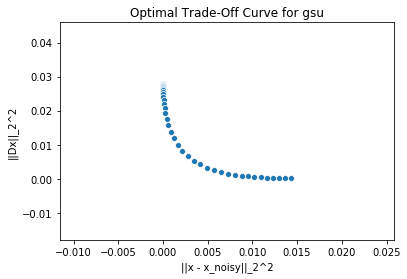

In [186]:
mus, J1, J2 = sweepParamAndPlot(x_gsu_noisy, "gsu", saveFig=True)

In [187]:
# A good candidate for mu is around the point (0.004, 0.004).
# which occurs when mu = 0.717251449792546
INDEX = 35
J1[35], J2[35], mus[35]

(0.004151260483021891, 0.004218590509784454, 0.717251449792546)

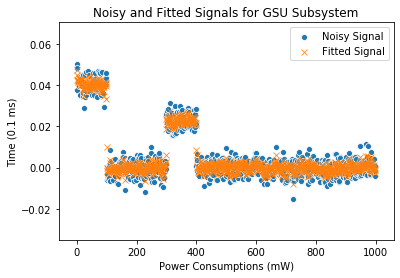

In [188]:
# Using the selected mu, plot both signal and estimate.
x_gsu_estimate = functorForOptimal(n)[0](mus[35], x_gsu_noisy)
ax = sns.scatterplot(x=range(len(x_gsu_noisy)), y=x_gsu_noisy.flatten(), marker='o', label="Noisy Signal")
ax = sns.scatterplot(x=range(len(x_gsu_estimate)), y=x_gsu_estimate.flatten(), marker='x', label="Fitted Signal")
ax.set_title("Noisy and Fitted Signals for GSU Subsystem")
ax.set(xlabel="Power Consumptions (mW)", ylabel="Time (0.1 ms)")
ax.get_figure().savefig("gsu_subsystem_plot")

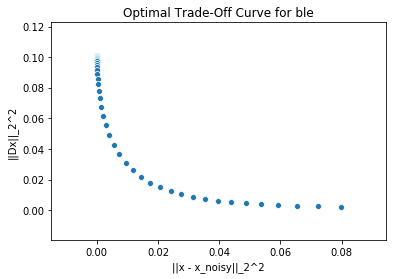

In [189]:
mus, J1s, J2s = sweepParamAndPlot(x_ble_noisy, "ble", saveFig=True)

In [194]:
# A good candidate for mu is around the point (0.004, 0.004).
# which occurs when 0.9243436791194677
INDEX = 36
J1s[INDEX], J2s[INDEX], mus[INDEX]

(0.017538795477413233, 0.01803654944679504, 0.9243436791194677)

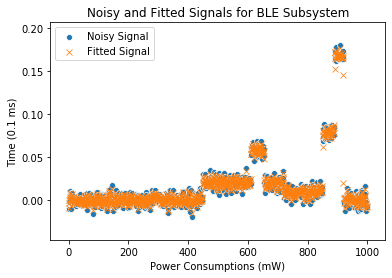

In [195]:
# Using the selected mu, plot both signal and estimate.
x_ble_estimate = functorForOptimal(n)[0](mus[30], x_ble_noisy)
ax = sns.scatterplot(x=range(len(x_ble_noisy)), y=x_ble_noisy.flatten(), marker='o', label="Noisy Signal")
ax = sns.scatterplot(x=range(len(x_ble_estimate)), y=x_ble_estimate.flatten(), marker='x', label="Fitted Signal")
ax.set_title("Noisy and Fitted Signals for BLE Subsystem")
ax.set(xlabel="Power Consumptions (mW)", ylabel="Time (0.1 ms)")
ax.get_figure().savefig("ble_subsystem_plot")